## Tarea 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [2]:
# Leemos el archivo de datos
data=pd.read_csv('data.csv', header=None)
data

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [3]:
x,y=data[0],data[1]

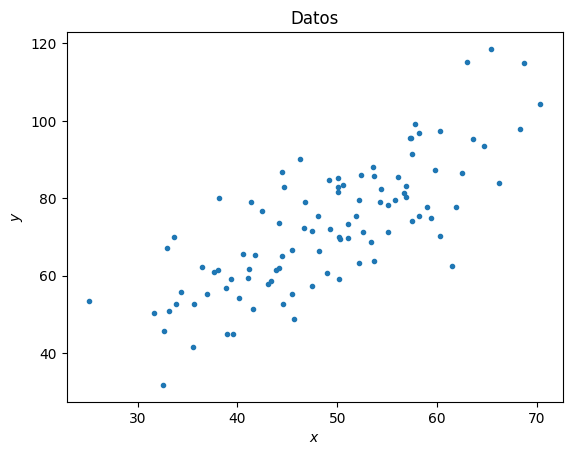

In [4]:
plt.plot(x,y,'.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Datos');

La ecuación del Error Cuadrático Medio (MSE) se define como:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Donde:
\begin{align*}
n & = \text{Número de observaciones} \\
y_i & = \text{Valor real en la observación } i \\
\hat{y}_i & = \text{Valor predicho en la observación } i
\end{align*}

Esta ecuación será nuestro indicador de qué tan buen modelo tenemos.

Para minimzar esta ecuación utilizaremos el descenso del gradiente 

Las ecuaciones del descenso del gradiente aplicado al Error Cuadrático Medio (MSE) en un contexto de aprendizaje automático son:

\begin{equation}
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} MSE(\theta)
\end{equation}

para $j = 0, 1, 2, \ldots, n$, donde:
\begin{align*}
\theta_j & = \text{Parámetro } j \\
\alpha & = \text{Tasa de aprendizaje (learning rate)} \\
\frac{\partial}{\partial \theta_j} MSE(\theta) & = \frac{1}{n} \sum_{i=1}^{n} (y_i - h_\theta(x_i))x_{ij}
\end{align*}

Donde:
\begin{align*}
n & = \text{Número de observaciones} \\
y_i & = \text{Valor real en la observación } i \\
h_\theta(x_i) & = \text{Valor predicho en la observación } i \text{ usando parámetros } \theta \\
x_{ij} & = \text{Valor de la característica } j \text{ en la observación } i
\end{align*}



In [5]:
def mse(m,b):
    mse = ((y - m*x - b) ** 2).mean()
    return mse

In [6]:
mse(1,1)

638.812631787963

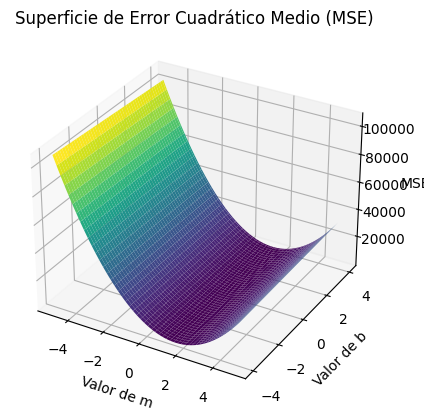

In [15]:
#%matplotlib widget
# Crear un rango de valores para m y b
m_values = np.linspace(-5, 5, 100)
b_values = np.linspace(-4, 4, 100)

# Crear una cuadrícula de valores para m y b
M, B = np.meshgrid(m_values, b_values)
Z = np.array([mse(m, b) for m, b in zip(np.ravel(M), np.ravel(B))])
Z = Z.reshape(M.shape)

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(M, B, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('Valor de m')
ax.set_ylabel('Valor de b')
ax.set_zlabel('MSE')

#ax.view_init(0, -70) #Con esto podemos cambiar el ángulo de visión de la gráfica [theta, phi]

# Título
plt.title('Superficie de Error Cuadrático Medio (MSE)')

# Mostrar la gráfica
plt.show()

Vamos a minimizar la función con otro programa por si acaso...

In [14]:
minimize(mse,1,1)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 112.10255209691758
        x: [ 1.460e+00]
      nit: 2
      jac: [ 3.529e-05]
 hess_inv: [[ 2.043e-04]]
     nfev: 10
     njev: 5

Ahora vamos a definir el loop para encontrar los valores mínimos.


In [35]:
eta=0.000001 #learning rate
epocas = 10000 #máximo de iteraciones
tol=0.8 #tolerancia para la norma del grad
mse_min = 113 #tolerancia para el cual, el mse es aceptable

In [36]:
n=0

b0=1.0
m0=1.0 #Puntos iniciales para b y m

while True:
    db=2*(y - m0*x - b0).mean()
    dm=2*((y - m0*x - b0)*x).mean()
    
    b = b0 + eta*db
    m = m0 + eta*dm

    # if mse(m,b) <=mse_min:
    #     print('Se ha alcanzado el error aceptable')
    #     break
    if n>=epocas:
        print('se han excedido el número de épocas')
        break
    if np.sqrt(dm**2 + db**2)<=tol:
        print('El gradiente es suficientemente pequeño')
        break   
    n=n+1
    b0=b
    m0=m

El gradiente es suficientemente pequeño


In [37]:
#error
mse(m,b)

112.09736295252203

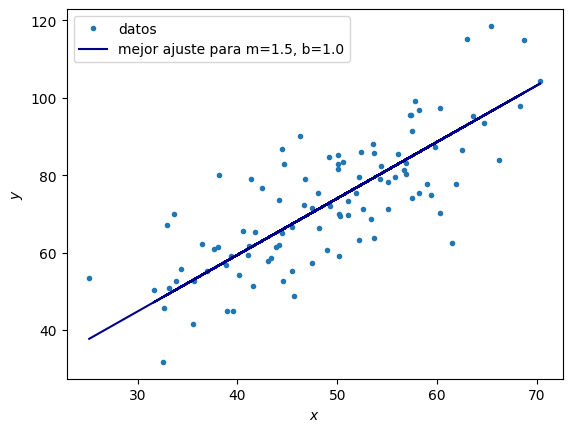

In [38]:
plt.plot(x,y,'.', label='datos')
plt.plot(x, m*x+b, color='darkblue', label='mejor ajuste para m=%.1f, b=%0.1f'%(m,b))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
#plt.title('Datos')